In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_set = pd.read_csv('/content/multiple_linear_regression_dataset.csv')
data_set.head()


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [ ]:
data_set.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


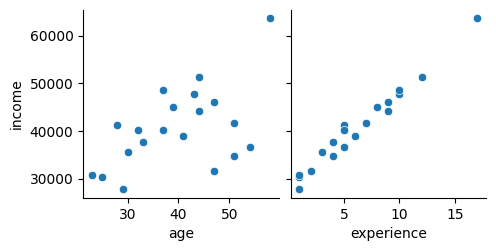

In [ ]:
sns.pairplot(data_set, x_vars=["age","experience"], y_vars=["income"])
plt.show()


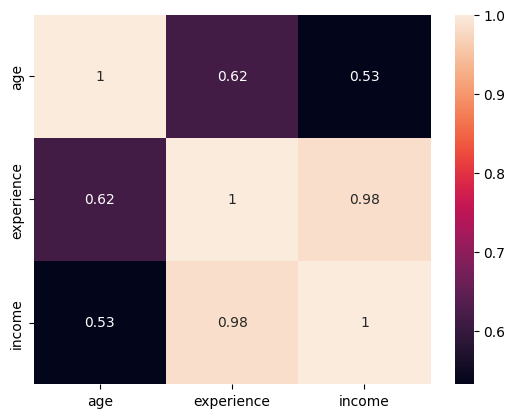

In [ ]:
sns.heatmap(data_set.corr(), annot = True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['age', 'experience', 'income']
data_set[num_vars] = scaler.fit_transform(data_set[num_vars])
data_set.head()


,age,experience,income
0,0.057143,0.0000,0.072987
1,0.200000,0.1250,0.218960
2,0.685714,0.0625,0.104586
3,0.257143,0.2500,0.343680
4,0.571429,0.5625,0.559004


In [ ]:
y = data_set['income']
X = data_set.drop(columns = ['income'], axis = 1)

print('X.shape: ', X.shape)
print('Y.shape: ', y.shape)


X.shape:  (20, 2)
Y.shape:  (20,)


In [ ]:
y = y.values.reshape(-1, 1)
print(y.shape)


(20, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
coefs = pd.DataFrame(lr.coef_,columns = ['age', 'experience'])
coefs


,age,experience
0,-0.090886,0.979485


In [30]:
print("Intercept: ", lr.intercept_)


Intercept:  [0.08656177]


In [ ]:
y_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r_2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score: ", r_2)
print("MSE: ", mse)
print("MAE: ", mae)


R2 Score:  0.8217356300109258
MSE:  0.0016510080292698127
MAE:  0.03618568160963322


In [29]:
# Ordinary Least Squares (OLS)
# Estimating coefficients of linear regression equations

import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
sm_model = sm.OLS(y_train,X_train_ols)
result = sm_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     363.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           8.94e-11
Time:                        16:49:27   Log-Likelihood:                 28.258
No. Observations:                  14   AIC:                            -50.52
Df Residuals:                      11   BIC:                            -48.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0866      0.018      4.919      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


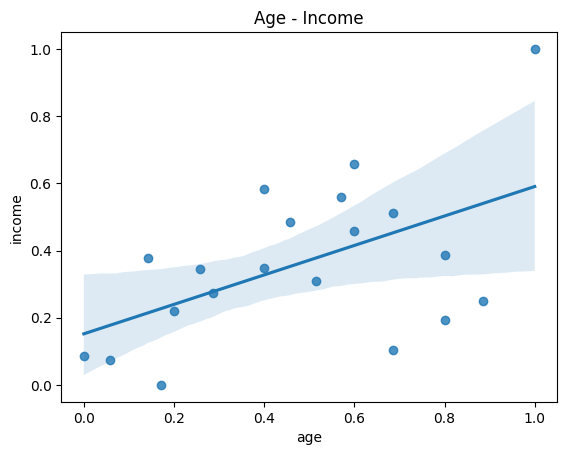

In [32]:
plt.title("Age - Income")
sns.regplot(x = data_set.age, y = data_set.income)
plt.show()


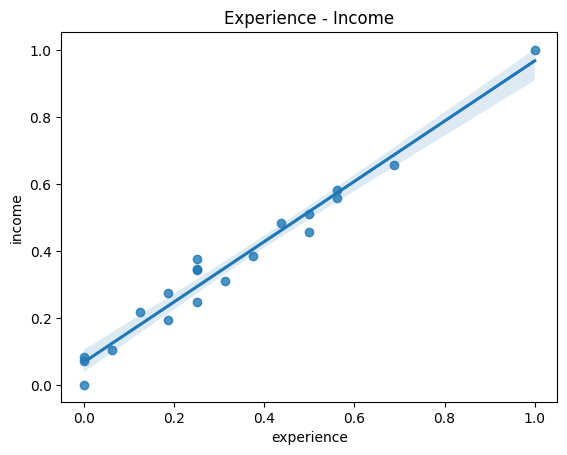

In [33]:
plt.title("Experience - Income")
sns.regplot(x = data_set.experience, y = data_set.income)
plt.show()
